## XGboost

In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "Twitter_Data.csv"
df = pd.read_csv(file_path)

# Display dataset info
print(df.head())

# Assuming the dataset has 'text' (input) and 'mental_health_issue' (target)
X = df['tweets']
y = df['label']

# Convert target labels to 0, 1, 2
# Assuming -1, 0, 1 are the unique values in your 'label' column
y = y.map({-1: 0, 0: 1, 1: 2})

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)), eval_metric='mlogloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

                                              tweets  label
0  when modi promised “minimum government maximum...     -1
1  talk all the nonsense and continue all the dra...      0
2  what did just say vote for modi  welcome bjp t...      1
3  asking his supporters prefix chowkidar their n...      1
4  answer who among these the most powerful world...      1
Accuracy: 0.8650
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.78      7105
           1       0.79      0.98      0.88     10946
           2       0.92      0.87      0.89     14545

    accuracy                           0.86     32596
   macro avg       0.87      0.84      0.85     32596
weighted avg       0.87      0.86      0.86     32596



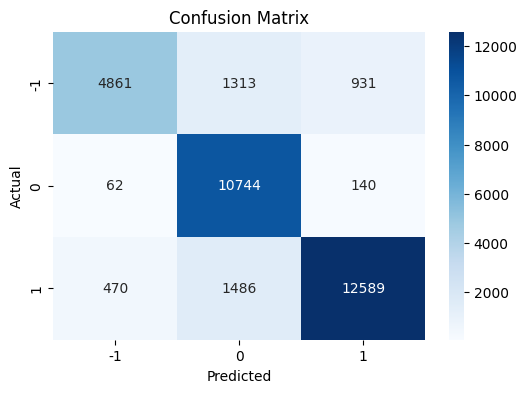

In [5]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Getting the pickle files

In [4]:
import pickle

# Save the TF-IDF Vectorizer as a .pkl file
with open('xgb_tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Save the trained XGBoost model as a .pkl file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)


## Testing on tweets.csv to get the sentiment column

In [11]:
import pandas as pd
import pickle

# Load the preprocessed tweets
file_path = "preprocessed_tweets.csv"
df_new = pd.read_csv(file_path)

# Display dataset preview
print("New Dataset Preview:")
print(df_new.head())

# Check column names
print("\nColumns in new dataset:", df_new.columns)

# Assuming the column containing the tweets is named "tweets"
text_column = "cleaned_text"

# Load the trained SVM model and TF-IDF vectorizer
with open("xgb_tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("xgb_model.pkl", "rb") as f:
    xgb_model = pickle.load(f)

# Transform the new tweets using the loaded vectorizer
X_new_tfidf = vectorizer.transform(df_new[text_column].astype(str))

# Predict sentiment using the trained SVM model
predictions = xgb_model.predict(X_new_tfidf)

# Add predictions as a new column
df_new["sentiments"] = predictions

# Save the updated DataFrame to a new CSV file
output_path = "predicted_tweets_xgb.csv"
df_new.to_csv(output_path, index=False)

print(f"\nPredictions saved to {output_path}")
print(df_new.head())


New Dataset Preview:
                                                Text  \
0  Excited to have Larry Ellison &amp; Kathleen W...   
1  When one of the interns working on the simulat...   
2                           @5AllanLeVito Got it 😀🇺🇦   
3  Yes. Supercharger coverage will extend to 100%...   
4                     @demishassabis Congratulations   

                                        cleaned_text  
0  excited larry ellison amp kathleen wilsonthomp...  
1          one interns working simulation drops ball  
2                                                got  
3  yes supercharger coverage extend europe next y...  
4                                    congratulations  

Columns in new dataset: Index(['Text', 'cleaned_text'], dtype='object')

Predictions saved to predicted_tweets_xgb.csv
                                                Text  \
0  Excited to have Larry Ellison &amp; Kathleen W...   
1  When one of the interns working on the simulat...   
2                       